### Importing the required libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import LassoLars, BayesianRidge
from sklearn.svm import SVC, SVR

import warnings
warnings.filterwarnings('ignore')

### Reading the data


In [3]:
data = pd.read_csv('dataset/weight-height.csv') # Reading the dataset

### Analysing the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


- **Dataset consists of 10000 records withe only 3 features.**
- **No Nan values are present in the dataset.**
- **We have "Gender", "Height", "Weight" features in the dataset.**
- **We can train the model using "Gender" and "Height" to predict the "Weight" of the person.**
- **We can train the model using "Gender" and "Weight" to predict the "Height" of the person.**
- **Or by considering the "Height" and "Weight" We can predict the "Gender".**
- **In the present project lets consider the "Gender" and "Height" of the person to predict the "Weight".**

In [6]:
data.head(2) # Lets see the sample of data with 2 records

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


### Visualize the dataset

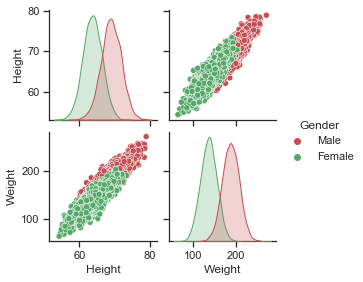

In [9]:
sns.set_theme(style="ticks")
palette = {"Male": "r", "Female":"g"}

g = sns.pairplot(data, hue="Gender", palette = palette, height=2, aspect=1)
g.fig.subplots_adjust(top=0.95)

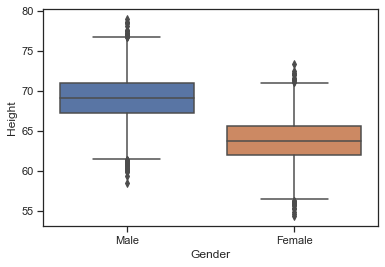

In [12]:
sns.boxplot(x="Gender",y="Height",data=data)

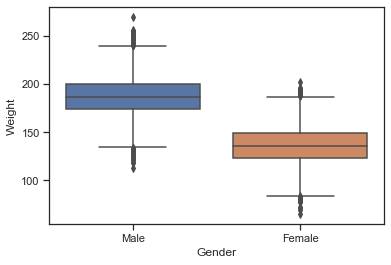

In [13]:
sns.boxplot(x="Gender",y="Weight",data=data)

- **From the plots we can see that the distribution of weight and height features is small in Female compared to Male.**

In [18]:
data['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

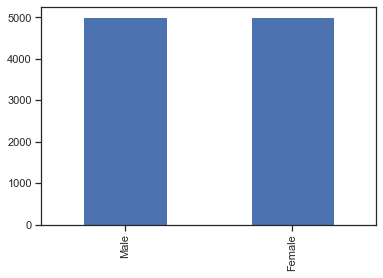

In [19]:
data["Gender"].value_counts().plot(kind='bar')

- **We can see that male and female persons in the dataset is equally distributed.**
- **And also Gneder is of type Object/categorical. we need to convert this into int type.**

In [20]:
# Lets created a dict with male and female
gender_dict = {"Male" : 0, "Female" : 1}

In [21]:
# Lets map the dict with the dataset column
data['Gender'] = data["Gender"].map(gender_dict)

In [22]:
data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  int64  
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


- **Now we can see that the values of Gender is converted into int.**

### Lets Check the correlation

In [24]:
data.corr()

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


- **We can see that the vfeatures are largely correlated to each other.So, these features will help the model better to understand and predict the correct values.**

### Lets define the error method

In [25]:
 # Provides the root mean square error value for the predictions and ground truths.
def rmse_(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

### Spliting the dataset

In [26]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, valid = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42)

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {valid.shape}') # getting test data shape

Shape of train dataset : (8000, 3)
Shape of train dataset : (2000, 3)


In [27]:
target = "Weight"
features = list(data.columns)
features = [i for i in features if i!=target]

In [28]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
valid_X= valid[features] # taking test data features
valid_y =valid[target]   #output value of test data

### Training

In [30]:
data.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [38]:
model = LinearRegression()
model.fit(train_X,train_y)
prediction=model.predict(valid_X)
rmse = rmse_(valid_y, prediction)
print(f'Root Mean Square error for the Linear regression model : {rmse}')

model = SVR()
model.fit(train_X,train_y)
prediction=model.predict(valid_X)
rmse = rmse_(valid_y, prediction)
print(f'Root Mean Square error for the Support Vector regression model : {rmse}')

model = SGDRegressor()
model.fit(train_X,train_y)
prediction=model.predict(valid_X)
rmse = rmse_(valid_y, prediction)
print(f'Root Mean Square error for the SGDRegressor model : {rmse}')

model = BayesianRidge()
model.fit(train_X,train_y)
prediction=model.predict(valid_X)
rmse = rmse_(valid_y, prediction)
print(f'Root Mean Square error for the BayesianRidge model : {rmse}')

model = LassoLars()
model.fit(train_X,train_y)
prediction=model.predict(valid_X)
rmse = rmse_(valid_y, prediction)
print(f'Root Mean Square error for the LassoLars model : {rmse}')

Root Mean Square error for the Linear regression model : 10.062021490244048
Root Mean Square error for the Support Vector regression model : 10.534040758942288
Root Mean Square error for the SGDRegressor model : 106534542.89747222
Root Mean Square error for theBayesianRidge model : 10.062040696264626
Root Mean Square error for the LassoLars model : 32.36764945748812


### OBSERVATION

- **We have trained different model on the dataset and found that Linear regression is performing better.**
- **We can even improve the model by chaning parameters and finetunnig the model.**
- **Dataset has only 2 fetures to predict the 